In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import re

import pylab as plt
import seaborn as sns

tiburones_ori = pd.read_csv("../data/attacks.csv", encoding= "ISO-8859-1")

tiburones = tiburones_ori.copy()

tiburones.describe().T



,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [3]:
tiburones.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
tiburones.shape

(25723, 24)

In [5]:
tiburones.info

<bound method DataFrame.info of       Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Gly

In [6]:
tiburones.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [7]:
tiburones.head(4)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN


In [8]:
tiburones.columns = tiburones.columns.str.strip()
tiburones.columns = tiburones.columns.str.lower()
tiburones["species"]


#len(tiburones["Case Number"].

0            White shark
1                    NaN
2                    NaN
3              2 m shark
4        Tiger shark, 3m
              ...       
25718                NaN
25719                NaN
25720                NaN
25721                NaN
25722                NaN
Name: species, Length: 25723, dtype: object

In [9]:
tiburones = tiburones.dropna(how="all")

In [10]:
tiburones_ori.shape, tiburones.shape

((25723, 24), (8703, 24))

In [11]:
tiburones.head(2)

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN


In [12]:
tiburones.year.unique()
#evaluo que fechas existen

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [13]:
tiburones.year[tiburones.year < 501].value_counts()
#miro cuales serian por debajo del año 500

0.0      125
500.0      1
77.0       1
5.0        1
Name: year, dtype: int64

In [14]:
tiburones = tiburones.drop(tiburones[(tiburones.year < 1923)].index)
#me cargo todos los que no sean por debajo de 1923 que son mis fines

In [15]:
tiburones.year[tiburones.year < 1923].value_counts() ,tiburones.year.unique()

(Series([], Name: year, dtype: int64),
 array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
        2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
        2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
        1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
        1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
        1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
        1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
        1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
        1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
        1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
        1929., 1928., 1927., 1926., 1925., 1924., 1923.]))

In [16]:
#tiburones.year[tiburones.year == nan].value_counts()
tiburones.info(memory_usage="Deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7615 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case number             7615 non-null   object 
 1   date                    5214 non-null   object 
 2   year                    5212 non-null   float64
 3   type                    5211 non-null   object 
 4   country                 5191 non-null   object 
 5   area                    4921 non-null   object 
 6   location                4864 non-null   object 
 7   activity                4815 non-null   object 
 8   name                    5066 non-null   object 
 9   sex                     4728 non-null   object 
 10  age                     3301 non-null   object 
 11  injury                  5197 non-null   object 
 12  fatal (y/n)             4791 non-null   object 
 13  time                    2778 non-null   object 
 14  species                 3170 non-null  

In [17]:
len(tiburones.country.unique())
#tiburones["country"].str.lower()



170

In [18]:
tiburones["country"] = tiburones["country"].str.lower()

In [19]:
len(tiburones.country.unique()), tiburones.country.unique()

(167,
 array(['usa', 'australia', 'mexico', 'brazil', 'england', 'south africa',
        'thailand', 'costa rica', 'maldives', 'bahamas', 'new caledonia',
        'ecuador', 'malaysia', 'libya', nan, 'cuba', 'mauritius',
        'new zealand', 'spain', 'samoa', 'solomon islands', 'japan',
        'egypt', 'st helena, british overseas territory', 'comoros',
        'reunion', 'french polynesia', 'united kingdom',
        'united arab emirates', 'philippines', 'indonesia', 'china',
        'columbia', 'cape verde', 'fiji', 'dominican republic',
        'cayman islands', 'aruba', 'mozambique', 'puerto rico', 'italy',
        'atlantic ocean', 'greece', 'st. martin', 'france',
        'papua new guinea', 'trinidad & tobago', 'kiribati', 'israel',
        'diego garcia', 'taiwan', 'jamaica', 'palestinian territories',
        'guam', 'seychelles', 'belize', 'nigeria', 'tonga', 'scotland',
        'canada', 'croatia', 'saudi arabia', 'chile', 'antigua', 'kenya',
        'russia', 'turks & ca

In [20]:
#nulos_casen = tiburones[(tiburones.dtypes == float).all(1)]

In [21]:
tiburones.date.str.replace("Reported ", "")

0        25-Jun-2018
1        18-Jun-2018
2        09-Jun-2018
3        08-Jun-2018
4        04-Jun-2018
            ...     
8698             NaN
8699             NaN
8700             NaN
8701             NaN
25722            NaN
Name: date, Length: 7615, dtype: object

In [22]:
"""
def limpiar2(x):
    
    # date_col= re.findall(r"[a-zA-Z]+|\d+", e)
    if (type(x) == str):
        return re.sub(r'\d+', " ", x)
    else: 
        return np.nan
for e in tiburones.date:
    tiburones.date = limpiar2(e)

tiburones.date

date_col=[]


def limpiar(string):
    try:
        x = string.replace('Reported ', '')
        x = x.strip().replace('.', ' ').replace('-', ' ')
        return x.split()
    except: return [np.nan, np.nan, np.nan]

#date_col=[limpiar(tiburones.date[e]) for e in tiburones.date]
date_col=[]
for e in tiburones.date:
    date_col.append(limpiar(e))

date_col[0:70]"""

'\ndef limpiar2(x):\n    \n    # date_col= re.findall(r"[a-zA-Z]+|\\d+", e)\n    if (type(x) == str):\n        return re.sub(r\'\\d+\', " ", x)\n    else: \n        return np.nan\nfor e in tiburones.date:\n    tiburones.date = limpiar2(e)\n\ntiburones.date\n\ndate_col=[]\n\n\ndef limpiar(string):\n    try:\n        x = string.replace(\'Reported \', \'\')\n        x = x.strip().replace(\'.\', \' \').replace(\'-\', \' \')\n        return x.split()\n    except: return [np.nan, np.nan, np.nan]\n\n#date_col=[limpiar(tiburones.date[e]) for e in tiburones.date]\ndate_col=[]\nfor e in tiburones.date:\n    date_col.append(limpiar(e))\n\ndate_col[0:70]'

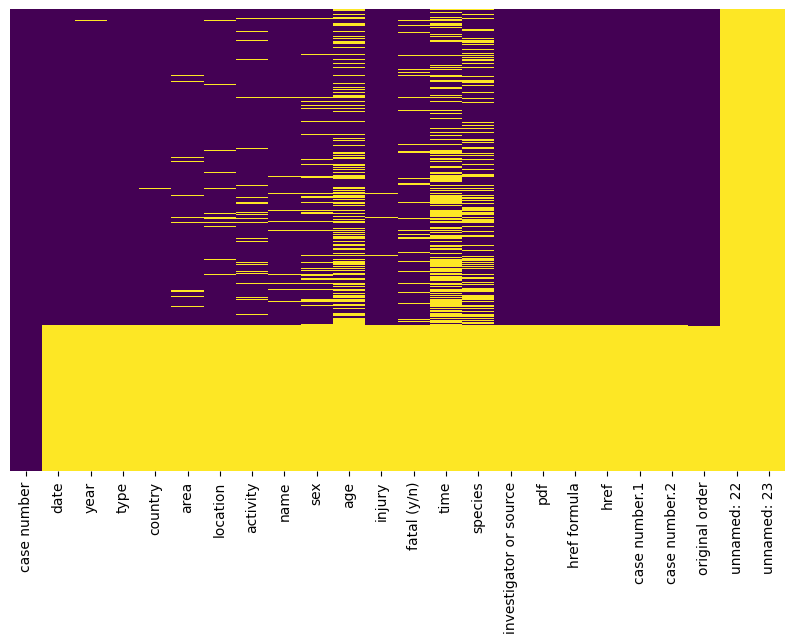

In [23]:
#empezamos la limpieza de nulos
nan_cols = tiburones.isna().sum()
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(tiburones.isna(),   # datos
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [24]:
#Según vemos, hay muchos casos que solo tienen el parámetro "case number". En nuestro caso y con el fin que buscamos, a eliminar
#todos los casos que no tengan país, para eso utilizamos el metodo dropna
#df.dropna(subset=['columna_especifica'], inplace=True)
tiburones.dropna(subset= ["country"], inplace=True)

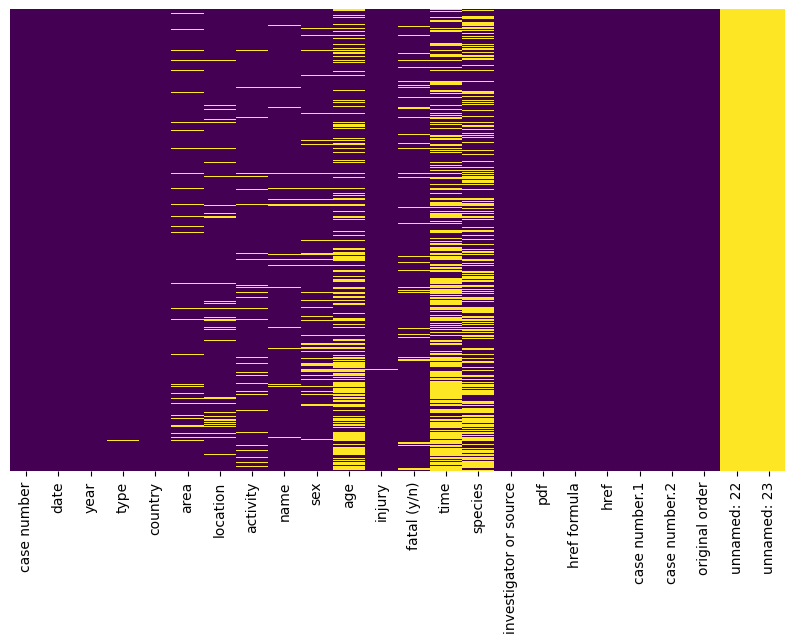

In [25]:
#volvemos a comprobar los gráficos para ver si se han eliminado las filas que queriamos
nan_cols = tiburones.isna().sum()
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(tiburones.isna(),   # datos
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [26]:
#vamos a llenar los nulos de las columnas que corresponderian al tipo de formatro estring
#para ello, al ser valores desconocidos, sustituimos los nulos por "unknown". Primero vemos que tipo de datos sont:
tiburones.dtypes

case number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
age                        object
injury                     object
fatal (y/n)                object
time                       object
species                    object
investigator or source     object
pdf                        object
href formula               object
href                       object
case number.1              object
case number.2              object
original order            float64
unnamed: 22                object
unnamed: 23                object
dtype: object

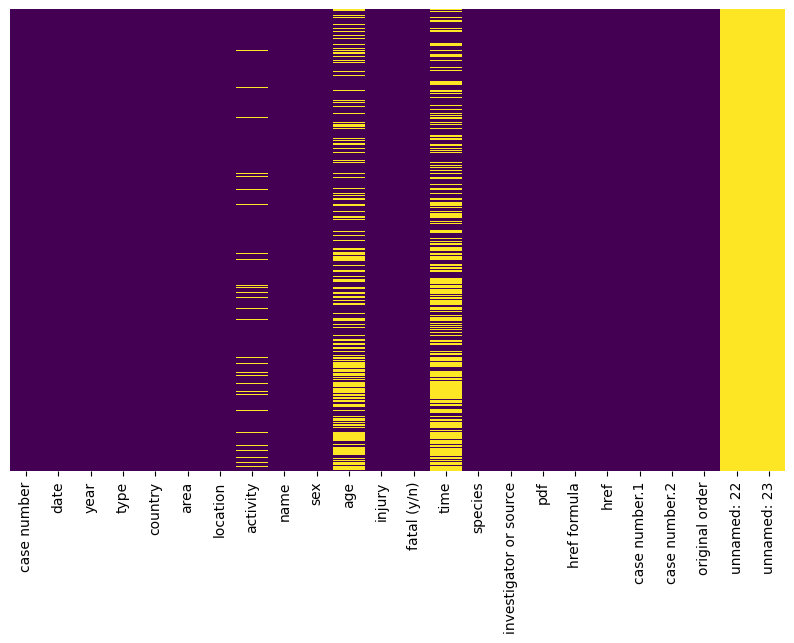

In [27]:
#ahora utilizamos fillna para reemplazar
#df['columna_especifica'].fillna(value=0, inplace=True)
tiburones["type"].fillna(value="unknown", inplace=True)
tiburones["area"].fillna(value="unknown", inplace=True)
tiburones["location"].fillna(value="unknown", inplace=True)
tiburones["name"].fillna(value="unknown", inplace=True)
tiburones["sex"].fillna(value="unknown", inplace=True)
tiburones["injury"].fillna(value="unknown", inplace=True)
tiburones["fatal (y/n)"].fillna(value="unknown", inplace=True)
tiburones["species"].fillna(value="unknown", inplace=True)
tiburones["pdf"].fillna(value="unknown", inplace=True)
tiburones["href"].fillna(value="unknown", inplace=True)
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(tiburones.isna(),   # datos
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();


In [28]:
#una columna interesante que habria que desarrollar para nuestro fin es la de fatal
#vamos a comprobar que contiene que no sean unknown para ver si los podemos unificar
tiburones["fatal (y/n)"].unique()


array(['N', 'Y', 'unknown', 'M', 'UNKNOWN', '2017', ' N'], dtype=object)

In [29]:
#vemos que hay algun valor que es distinto a "n y "y". tambien vemos que están en mayusculas
#vamos a pasar los valores a minusculas para unificar los valores unknown, y aprovechamos quitamos el espacio de un n
tiburones["fatal (y/n)"]= tiburones["fatal (y/n)"].str.strip()
tiburones["fatal (y/n)"]= tiburones["fatal (y/n)"].str.lower()
tiburones["fatal (y/n)"].unique(), tiburones["fatal (y/n)"].dtypes

(array(['n', 'y', 'unknown', 'm', '2017'], dtype=object), dtype('O'))

In [30]:
#ahora vamos a ver que contexto tienen tanto el "m" como el "2017"
mascara = tiburones["fatal (y/n)"] == "m"
nonoyes = tiburones[(tiburones["fatal (y/n)"] == "m") | (tiburones["fatal (y/n)"] == "2017")]
nonoyes.head()

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order,unnamed: 22,unnamed: 23
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,french polynesia,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,m,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0,NaN,NaN
786,2012.06.10,10-Jun-2012,2012.0,Provoked,italy,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,NaN,NaN


In [31]:
#comprobamos que por el contexto de la columna "injury", el ataque no es fatal, por lo que podemos modificarlo a "n"
#df.loc[0, 'columna_especifica'] = nuevo_valor
#df.loc[df['columna_especifica'] == valor_especifico]
tiburones.loc[tiburones["fatal (y/n)"] == "2017"] = "n" 
tiburones.loc[tiburones["fatal (y/n)"] == "m"] = "n"
tiburones["fatal (y/n)"].unique()

array(['n', 'y', 'unknown'], dtype=object)

In [32]:
#como hemos terminado con esta columna, la convertimos a tipo string
tiburones["fatal (y/n)"] = tiburones["fatal (y/n)"].astype(str)
tiburones["fatal (y/n)"].info

<bound method Series.info of 0             n
1             n
2             n
3             n
4             n
         ...   
5210    unknown
5211          n
5212          y
5213          n
6079          y
Name: fatal (y/n), Length: 5191, dtype: object>

In [33]:
#vemos que no ha cambiado, por lo que comprobamos si hay algun valor que no sea de tipo string
tiburones["fatal (y/n)"].value_counts()

n          3859
y           861
unknown     471
Name: fatal (y/n), dtype: int64

In [40]:
#investigamos un poco y nos damos cuenta que no hay columnas tipo string, si no que son tipo objeto. No existen typo string para columnas
#ahora nos centraremos en ver si podemos adelgazar columnas que puedan ser numericas
tiburones["year"].value_counts()

2015.0    143
2017.0    135
2016.0    129
2011.0    128
2014.0    126
         ... 
1927.0     19
1924.0     19
1945.0     16
1925.0     14
n           2
Name: year, Length: 97, dtype: int64

In [39]:
for c in tiburones.select_dtypes('float'):
    
    tiburones[c]=pd.to_numeric(tiburones[c], downcast='integer')
    
tiburones.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5191 entries, 0 to 6079
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case number             5191 non-null   object
 1   date                    5191 non-null   object
 2   year                    5189 non-null   object
 3   type                    5191 non-null   object
 4   country                 5191 non-null   object
 5   area                    5191 non-null   object
 6   location                5191 non-null   object
 7   activity                4796 non-null   object
 8   name                    5191 non-null   object
 9   sex                     5191 non-null   object
 10  age                     3295 non-null   object
 11  injury                  5191 non-null   object
 12  fatal (y/n)             5191 non-null   object
 13  time                    2773 non-null   object
 14  species                 5191 non-null   object
 15  inve